In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

In [3]:
df_review = pd.read_csv('Myntra_NLP/mynthra_tshirt_cleaned_dataset.csv')

In [4]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_id                1253 non-null   int64  
 1   product_name              1253 non-null   object 
 2   product_description       1253 non-null   object 
 3   discounted_price          1253 non-null   int64  
 4   original_price            1253 non-null   int64  
 5   discount_percentage       1253 non-null   int64  
 6   fabric_material           1253 non-null   object 
 7   neck_type                 1253 non-null   object 
 8   overall_rating            1253 non-null   float64
 9   votes                     1253 non-null   int64  
 10  customer_rated_rating     1253 non-null   object 
 11  customer_review_text      1253 non-null   object 
 12  reviewers_username        1253 non-null   object 
 13  date_of_review            1253 non-null   object 
 14  reviewer

In [5]:
df_review['customer_review_text'].isnull().sum()

0

Cleaning

In [6]:
df_review['customer_review_text'].sample(5)

289    ["Good fit. However the fit isn't what I was e...
765                     ['Product quality is top notch']
191    ['Ok', 'Very poor quality. Not as per Wrogn st...
311    ["it's actually blackish-faded blue with maroo...
284                  ['Became lose after a few washes.']
Name: customer_review_text, dtype: object

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentAnalyzer
from nltk import tokenize

In [8]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [9]:
sentim_analyzer = SentimentAnalyzer()

In [10]:
review = tokenize.sent_tokenize(df_review['customer_review_text'][36])

for sentiment in review:
  sid = SentimentIntensityAnalyzer()
  print(sentiment)
  ss = sid.polarity_scores(sentiment)
  for k in sorted(ss):
    print('{0}:{1}, '.format(k, ss[k]), end="")
  print()

['Good quality', '', 'Product quality is not good and size also not fit', 'Size is too large', 'Third class T-shirt', 'Too lose']
compound:-0.3412, neg:0.103, neu:0.897, pos:0.0, 


In [11]:
# Sentiment analysis

def analyze_sentiment(review):
    # Initialize the sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    # Get the compound sentiment score
    sentiment_score = sid.polarity_scores(review)['compound']

    # Classify as positive or negative based on the sentiment score
    if sentiment_score >= 0:
        return 'Positive'
    else:
        return 'Negative'


In [12]:
df_review.insert(13,'sentiment_label_wo_sw','')

In [13]:
for i in range(len(df_review)):
  review_text = df_review['customer_review_text'][i]
  df_review.at[i,'sentiment_label_wo_sw'] = analyze_sentiment(review_text)


In [14]:
df_review['sentiment_label_wo_sw'].value_counts(dropna=False)

Positive    1147
Negative     106
Name: sentiment_label_wo_sw, dtype: int64

In [15]:
df_review = df_review.rename(columns={'sentiment_label_wo_sw':'sentiment_label'})

In [16]:
df_review.sample(2)

,product_id,product_name,product_description,discounted_price,original_price,discount_percentage,fabric_material,neck_type,overall_rating,votes,customer_rated_rating,customer_review_text,reviewers_username,sentiment_label,date_of_review,reviewers_product_images
443,23258222,HIGHLANDER,Blue Striped Polo Collar Slim Fit T-shirt,543,1699,68,Polyester,Polo Collar,3.9,570,"['3', '5', '4', '1']","['Product quality not good', ""It's good qualit...","['Gourav Mondal', 'Chaitanya', 'Abdul Salam', ...",Negative,"['15 Oct 2023', '16 Dec 2023', '13 July 2023',...",[]
319,24704290,Fleximaa,Polo Collar Pure Cotton T-shirt,519,999,52,Pure Cotton,Polo Collar,4.2,5,['1'],"['Poor quality, a kind of cheating']",['Martin Lowel'],Positive,['2 Jan 2024'],[]


In [17]:
#df_review.to_csv('mynthra_dataset_review_label.csv')

## Cleaning Review

In [18]:
df_review['customer_review_text'][2]

'[\'Comfortable fabric and bottle green colour\', "This is my first order on myntra..?. Product quality is very good? and it\'s so comfortable ?. The time of delivery is very good?. Being a customer of myntra i am sooo happy??", \'I bought this tshirt first for my brother and i really liked the fit and fabric...so I bought the same for myself but this time I got a tshirt which looks the same but with rough fabric..\', "The product sheds color dye right after first use. It is advisable to wash it alone. The product is thinner but it\'s worth it if you\'re paying anything between 300 - 350. Also buy one size more than what is mentioned.", "Product is good , but could have been better, it\'s thinner considering the price and the length is somewhat short ( negligible yet recognisable)", "The quality of the product is superb, it\'s just the size. It\'s not the original size as mentioned. I usually wear M but for this I need to exchange for the size L. Other than that I loved the quality and

In [19]:
re.sub(r"'s\b", " is", df_review['customer_review_text'][2])

'[\'Comfortable fabric and bottle green colour\', "This is my first order on myntra..?. Product quality is very good? and it is so comfortable ?. The time of delivery is very good?. Being a customer of myntra i am sooo happy??", \'I bought this tshirt first for my brother and i really liked the fit and fabric...so I bought the same for myself but this time I got a tshirt which looks the same but with rough fabric..\', "The product sheds color dye right after first use. It is advisable to wash it alone. The product is thinner but it is worth it if you\'re paying anything between 300 - 350. Also buy one size more than what is mentioned.", "Product is good , but could have been better, it is thinner considering the price and the length is somewhat short ( negligible yet recognisable)", "The quality of the product is superb, it is just the size. It is not the original size as mentioned. I usually wear M but for this I need to exchange for the size L. Other than that I loved the quality and

In [20]:
re.sub(r'[^a-zA-Z]',' ', df_review['customer_review_text'][2])

'  Comfortable fabric and bottle green colour    This is my first order on myntra     Product quality is very good  and it s so comfortable    The time of delivery is very good   Being a customer of myntra i am sooo happy      I bought this tshirt first for my brother and i really liked the fit and fabric   so I bought the same for myself but this time I got a tshirt which looks the same but with rough fabric      The product sheds color dye right after first use  It is advisable to wash it alone  The product is thinner but it s worth it if you re paying anything between            Also buy one size more than what is mentioned     Product is good   but could have been better  it s thinner considering the price and the length is somewhat short   negligible yet recognisable     The quality of the product is superb  it s just the size  It s not the original size as mentioned  I usually wear M but for this I need to exchange for the size L  Other than that I loved the quality and the print

In [21]:
re.sub(r'[^\s\w]|[\d]',' ', df_review['customer_review_text'][2])

'  Comfortable fabric and bottle green colour    This is my first order on myntra     Product quality is very good  and it s so comfortable    The time of delivery is very good   Being a customer of myntra i am sooo happy      I bought this tshirt first for my brother and i really liked the fit and fabric   so I bought the same for myself but this time I got a tshirt which looks the same but with rough fabric      The product sheds color dye right after first use  It is advisable to wash it alone  The product is thinner but it s worth it if you re paying anything between            Also buy one size more than what is mentioned     Product is good   but could have been better  it s thinner considering the price and the length is somewhat short   negligible yet recognisable     The quality of the product is superb  it s just the size  It s not the original size as mentioned  I usually wear M but for this I need to exchange for the size L  Other than that I loved the quality and the print

In [22]:
re.sub(r'[^\w\s]','', df_review['customer_review_text'][2])

'Comfortable fabric and bottle green colour This is my first order on myntra Product quality is very good and its so comfortable  The time of delivery is very good Being a customer of myntra i am sooo happy I bought this tshirt first for my brother and i really liked the fit and fabricso I bought the same for myself but this time I got a tshirt which looks the same but with rough fabric The product sheds color dye right after first use It is advisable to wash it alone The product is thinner but its worth it if youre paying anything between 300  350 Also buy one size more than what is mentioned Product is good  but could have been better its thinner considering the price and the length is somewhat short  negligible yet recognisable The quality of the product is superb its just the size Its not the original size as mentioned I usually wear M but for this I need to exchange for the size L Other than that I loved the quality and the print 5 full star Product is nice But length is somewhat 

In [23]:
re.sub(r'[^\w\s]|[\d]','', df_review['customer_review_text'][2])

'Comfortable fabric and bottle green colour This is my first order on myntra Product quality is very good and its so comfortable  The time of delivery is very good Being a customer of myntra i am sooo happy I bought this tshirt first for my brother and i really liked the fit and fabricso I bought the same for myself but this time I got a tshirt which looks the same but with rough fabric The product sheds color dye right after first use It is advisable to wash it alone The product is thinner but its worth it if youre paying anything between    Also buy one size more than what is mentioned Product is good  but could have been better its thinner considering the price and the length is somewhat short  negligible yet recognisable The quality of the product is superb its just the size Its not the original size as mentioned I usually wear M but for this I need to exchange for the size L Other than that I loved the quality and the print  full star Product is nice But length is somewhat short f

In [24]:
df_review['customer_review_text'][2].lower().strip()

'[\'comfortable fabric and bottle green colour\', "this is my first order on myntra..?. product quality is very good? and it\'s so comfortable ?. the time of delivery is very good?. being a customer of myntra i am sooo happy??", \'i bought this tshirt first for my brother and i really liked the fit and fabric...so i bought the same for myself but this time i got a tshirt which looks the same but with rough fabric..\', "the product sheds color dye right after first use. it is advisable to wash it alone. the product is thinner but it\'s worth it if you\'re paying anything between 300 - 350. also buy one size more than what is mentioned.", "product is good , but could have been better, it\'s thinner considering the price and the length is somewhat short ( negligible yet recognisable)", "the quality of the product is superb, it\'s just the size. it\'s not the original size as mentioned. i usually wear m but for this i need to exchange for the size l. other than that i loved the quality and

Define the cleaner function

In [25]:
def review_clean(review):
  new_review = re.sub(r"'s\b", " is", review)
  new_review = re.sub(r'[^a-zA-Z]',' ', review)
  new_review = new_review.lower().strip()
  return new_review

In [26]:
cleaned_review = []
for comment in df_review['customer_review_text']:
  cleaned_review.append(review_clean(comment))

In [27]:
cleaned_review[1]

'the size correct fit and ok quality value for the money    after one wash colour faded    just wow  loved it       pathetic waste product poor quality material   even shortage of material between stitching  pls don t waste your money on it  highly suggest don t don t buy this      poor material and low quality prints especially the brand naming on the back     was littlebit tight at the under arm  other wise good product at this price      fabric quality is not good overall okay    fitting was good but fabric is not good    now i ok with it    after fiting this  this like wonderful            the experience was good    nice t    poor quality product     completely not suited for me     it s fits me well    threads are coming out from the mid point of back rest all good    super    material is not good    fabric quality is not good    the quality was not good    quality is not good     nice one  go for it     good for price    fit was correct    nyc product    perfect fit    overall th

In [28]:
df_review['cleaned_review_w/o_sw'] = cleaned_review

In [29]:
df_review.sample(3)

,product_id,product_name,product_description,discounted_price,original_price,discount_percentage,fabric_material,neck_type,overall_rating,votes,customer_rated_rating,customer_review_text,reviewers_username,sentiment_label,date_of_review,reviewers_product_images,cleaned_review_w/o_sw
328,25072106,Stormborn,Graphic Printed Oversized Drop Shoulder Sleeve...,499,999,50,Cotton,Round Neck,4.3,34,"['5', '5']","['Very nice', 'Loved it']","['Goutam Gowda', 'Susmita']",Positive,"['12 Dec 2023', '29 Nov 2023']",[],very nice loved it
272,22910888,Allen Solly,Men Solid Regular Fit T-shirt,714,1099,35,Cotton,Round Neck,4.5,69,"['1', '1', '3', '5', '5', '5', '5']",['Buying on Myntra app is totally waste of tim...,"['Rahul Singh', 'Gourav Kirar', 'Santosh Kumar...",Positive,"['14 Sept 2023', '26 July 2023', '19 Aug 2023'...",[],buying on myntra app is totally waste of time ...
456,18391060,XYXX,Men Yellow N9 Silver Finish Solid Lounge T-shirts,353,599,41,Cotton,Round Neck,4.5,490,"['5', '5', '5', '5', '5', '5', '5', '5', '5', ...","[""Perfect fitting tshirt with such a comfortab...","['Vaishali Upadhyay', 'A T', 'Ayush Soni', 'Aa...",Positive,"['4 Aug 2022', '30 July 2022', '2 Aug 2022', '...",[],perfect fitting tshirt with such a comfortable...


## Sentiment analysis after cleaning

In [30]:
sentiment_after_clean = []
for sent in df_review['cleaned_review_w/o_sw']:
  sentiment_after_clean.append(analyze_sentiment(sent))

sentiment_after_clean[1]


'Positive'

In [31]:
df_review['label_cleaned_review'] = sentiment_after_clean

In [32]:
df_review['label_cleaned_review'].value_counts(normalize=True)*100

Positive    91.939346
Negative     8.060654
Name: label_cleaned_review, dtype: float64

In [33]:
df_review['sentiment_label'].value_counts(normalize=True)*100

Positive    91.540303
Negative     8.459697
Name: sentiment_label, dtype: float64

In [34]:
df_review['cleaned_review_w/o_sw'][1].split()

['the',
 'size',
 'correct',
 'fit',
 'and',
 'ok',
 'quality',
 'value',
 'for',
 'the',
 'money',
 'after',
 'one',
 'wash',
 'colour',
 'faded',
 'just',
 'wow',
 'loved',
 'it',
 'pathetic',
 'waste',
 'product',
 'poor',
 'quality',
 'material',
 'even',
 'shortage',
 'of',
 'material',
 'between',
 'stitching',
 'pls',
 'don',
 't',
 'waste',
 'your',
 'money',
 'on',
 'it',
 'highly',
 'suggest',
 'don',
 't',
 'don',
 't',
 'buy',
 'this',
 'poor',
 'material',
 'and',
 'low',
 'quality',
 'prints',
 'especially',
 'the',
 'brand',
 'naming',
 'on',
 'the',
 'back',
 'was',
 'littlebit',
 'tight',
 'at',
 'the',
 'under',
 'arm',
 'other',
 'wise',
 'good',
 'product',
 'at',
 'this',
 'price',
 'fabric',
 'quality',
 'is',
 'not',
 'good',
 'overall',
 'okay',
 'fitting',
 'was',
 'good',
 'but',
 'fabric',
 'is',
 'not',
 'good',
 'now',
 'i',
 'ok',
 'with',
 'it',
 'after',
 'fiting',
 'this',
 'this',
 'like',
 'wonderful',
 'the',
 'experience',
 'was',
 'good',
 'nice',


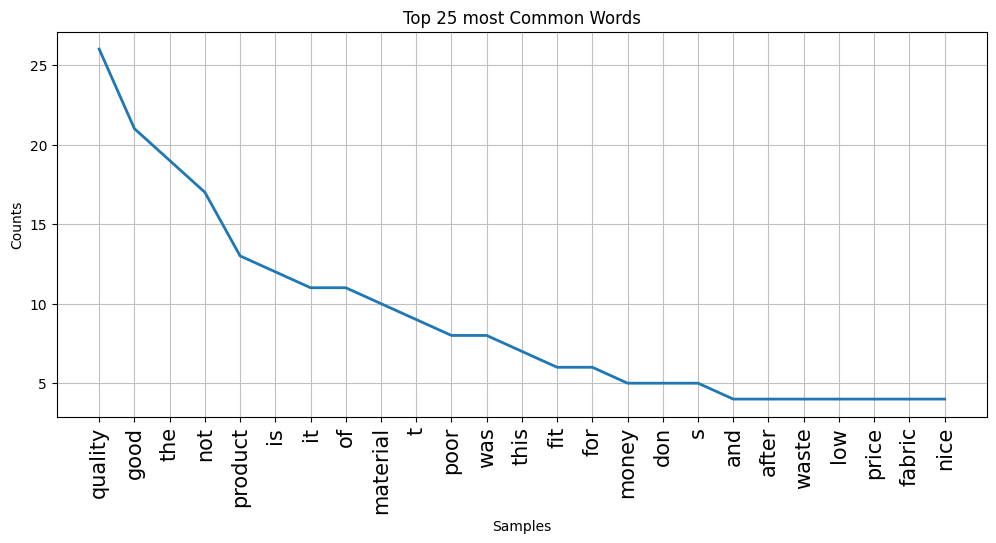

In [35]:
# Frequency Distribution

freq_dist = nltk.FreqDist(df_review['cleaned_review_w/o_sw'][1].split())

plt.figure(figsize=(12,5))
plt.title('Top 25 most Common Words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)
plt.show()

In [36]:
list(freq_dist)[0:5]

['quality', 'good', 'the', 'not', 'product']

### Data Visualization

In [37]:
all_words = []
for text in df_review['cleaned_review_w/o_sw']:
  all_words.extend(text.split())

print(all_words[:50])
len(set(all_words))

['product', 'quality', 'is', 'good', 'but', 'little', 'short', 'for', 'over', 'medium', 'height', 'person', 'good', 'quality', 'fabric', 'comfortable', 'to', 'wear', 'aesthetically', 'pleasing', 'nice', 'product', 'good', 'quality', 'amazing', 'fit', 'high', 'quality', 'product', 'the', 'color', 'is', 'just', 'a', 'bit', 'different', 'from', 'on', 'screen', 'and', 'in', 'real', 'however', 'this', 'is', 'also', 'nice', 'overall', 'value', 'for']


6429

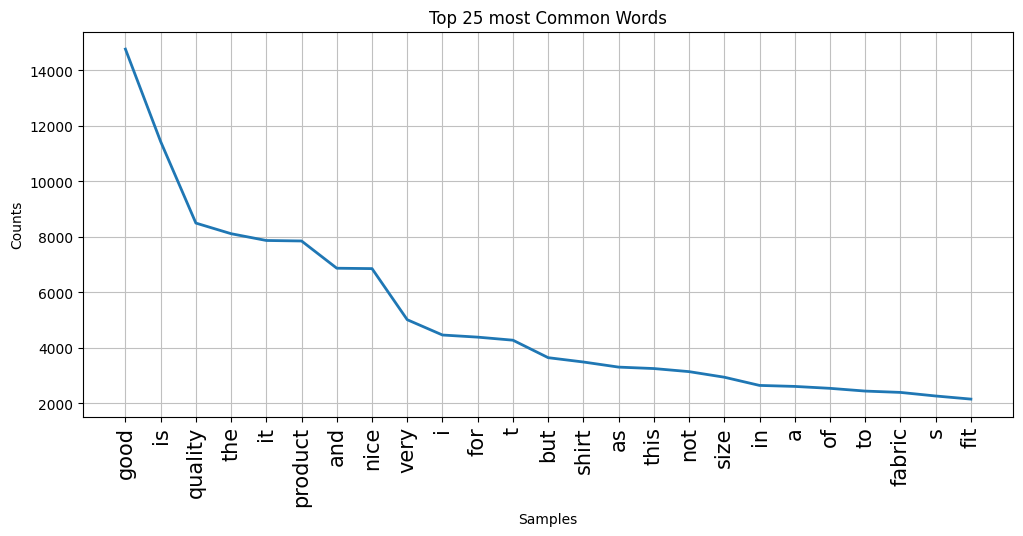

In [38]:
# Frequency Distribution

freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most Common Words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)
plt.show()

## cleaning with normalizer

In [39]:
# Normalization

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [40]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [41]:
new_comment = ''
for token in df_review['customer_review_text'][3].split():
  new_comment = new_comment + lemmatizer.lemmatize(token.lower()) + ' '

new_comment

'["tshirt is look so amazing and truly it\'s fit on me 🤩", \'very fine quality without any doubt you can buy\', \'good quality light weight 👍\', \'value for money\', \'awesome 😎\', \'nice\', \'excellent fit with overall star ⭐ experience like hrithik roshan\', "good one but if customer tell about negetive thing myntra doesn\'t approve review 🤣🤣🤣🤣", \'quite thin for winters. although i understand that gym wear ha to be breathable, but there are other brand who have a thin wool layer inside. otherwise if i had to buy this for summers, i can easily go for regular half sleeve or without sleeve tshirts with no high necks. i would rate this a average.\', \'well product very comfortable\', \'👍 nice\', \'perfect fit. comfortable and good quality fabric. good product and highly satisfied. thank you hrx and myntra.\', \'superb\', \'ok ok\', \'bad product\', \'quality and fabric is not good\', \'good\'] '

In [42]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.6 MB/s eta 0:00:00


In [43]:
import contractions
df_review['customer_review_text'][3]

'["Tshirt is looks so amazing and truly it\'s fits on me 🤩", \'Very fine quality without any doubt you can buy\', \'Good quality Light weight 👍\', \'Value for money\', \'Awesome 😎\', \'Nice\', \'Excellent fit with overall star ⭐ experience like Hrithik Roshan\', "Good one but if customer tells about negetive things Myntra doesn\'t approve review 🤣🤣🤣🤣", \'quite thin for winters. although i understand that gym wear has to be breathable, but there are other brands who have a thin wool layer inside. otherwise if i had to buy this for summers, i can easily go for regular half sleeve or without sleeve tshirts with no high necks. i would rate this as average.\', \'Well Product very comfortable\', \'👍 nice\', \'Perfect fit. Comfortable and good quality fabric. Good product and highly satisfied. Thank you HRX and Myntra.\', \'Superb\', \'Ok ok\', \'Bad product\', \'Quality and fabric is not good\', \'Good\']'

In [44]:
contractions.fix(df_review['customer_review_text'][3])

'["Tshirt is looks so amazing and truly it is fits on me 🤩", \'Very fine quality without any doubt you can buy\', \'Good quality Light weight 👍\', \'Value for money\', \'Awesome 😎\', \'Nice\', \'Excellent fit with overall star ⭐ experience like Hrithik Roshan\', "Good one but if customer tells about negetive things Myntra does not approve review 🤣🤣🤣🤣", \'quite thin for winters. although i understand that gym wear has to be breathable, but there are other brands who have a thin wool layer inside. otherwise if i had to buy this for summers, i can easily go for regular half sleeve or without sleeve tshirts with no high necks. i would rate this as average.\', \'Well Product very comfortable\', \'👍 nice\', \'Perfect fit. Comfortable and good quality fabric. Good product and highly satisfied. Thank you HRX and Myntra.\', \'Superb\', \'Ok ok\', \'Bad product\', \'Quality and fabric is not good\', \'Good\']'

In [45]:
def review_clean_without_stopwords(review):
  new_review = re.sub(r"'s\b", " is", review)
  new_review = contractions.fix(review)
  new_review = re.sub(r'[^a-zA-Z]',' ', review)
  new_review = new_review.lower().strip()

  cleaned_review = ""
  for token in new_review.split():
    cleaned_review = cleaned_review + lemmatizer.lemmatize(token) + ' '

  return new_review

In [46]:
clean_comment = []
for comment in df_review['customer_review_text']:
  clean_comment.append(review_clean_without_stopwords(comment))

In [47]:
df_review['fullycleaned_review_w/o_sw'] = clean_comment

In [48]:
df_review['fullycleaned_review_w/o_sw'][1]

'the size correct fit and ok quality value for the money    after one wash colour faded    just wow  loved it       pathetic waste product poor quality material   even shortage of material between stitching  pls don t waste your money on it  highly suggest don t don t buy this      poor material and low quality prints especially the brand naming on the back     was littlebit tight at the under arm  other wise good product at this price      fabric quality is not good overall okay    fitting was good but fabric is not good    now i ok with it    after fiting this  this like wonderful            the experience was good    nice t    poor quality product     completely not suited for me     it s fits me well    threads are coming out from the mid point of back rest all good    super    material is not good    fabric quality is not good    the quality was not good    quality is not good     nice one  go for it     good for price    fit was correct    nyc product    perfect fit    overall th

#### sentiment without sw for fully cleaned

In [49]:
sentiment_after_fullclean = []
for sent in df_review['fullycleaned_review_w/o_sw']:
  sentiment_after_fullclean.append(analyze_sentiment(sent))

sentiment_after_clean[1]


'Positive'

In [50]:
df_review['label_fullycleaned_w/o_sw'] = sentiment_after_fullclean

In [51]:
df_review['label_fullycleaned_w/o_sw'].value_counts(normalize=True)*100

Positive    91.939346
Negative     8.060654
Name: label_fullycleaned_w/o_sw, dtype: float64

## with stopwords

In [52]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [53]:
nltk_stopwords = set(stopwords.words('english'))
nltk_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [54]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)
len(sklearn_stopwords)

{'or', 'through', 'about', 'ourselves', 'serious', 'why', 'me', 'amount', 'two', 'them', 'therein', 'although', 'beyond', 'both', 'three', 'own', 'everyone', 'enough', 'thereafter', 'fire', 'they', 'move', 'sixty', 'there', 'he', 'towards', 're', 'bill', 'himself', 'seemed', 'i', 'amongst', 'my', 'here', 'hereby', 'may', 'mostly', 'ours', 'each', 'nor', 'together', 'are', 'someone', 'who', 'beside', 'wherever', 'twenty', 'against', 'whether', 'sincere', 'nothing', 'off', 'herself', 'once', 'ten', 'among', 'con', 'for', 'only', 'anyone', 'whereafter', 'thin', 'moreover', 'most', 'perhaps', 'also', 'find', 'am', 'others', 'de', 'third', 'was', 'etc', 'until', 'whose', 'few', 'her', 'co', 'found', 'between', 'our', 'thru', 'latter', 'then', 'done', 'whence', 'anyway', 'meanwhile', 'while', 'when', 'alone', 'empty', 'sometime', 'since', 'anyhow', 'thick', 'therefore', 'within', 'eg', 'interest', 'other', 'via', 'fifty', 'more', 'very', 'bottom', 'over', 'she', 'hereupon', 'as', 'becomes', 

318

In [55]:
# combine the nltk and sklearn stopwords
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)
combined_stopwords

{'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'ain',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'aren',
 "aren't",
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bill',
 'both',
 'bottom',
 'but',
 'by',
 'call',
 'can',
 'cannot',
 'cant',
 'co',
 'con',
 'could',
 'couldn',
 "couldn't",
 'couldnt',
 'cry',
 'd',
 'de',
 'describe',
 'detail',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'done',
 'down',
 'due',
 'during',
 'each',
 'eg',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'etc',
 'even',
 'ever',
 

In [56]:
domain_stopwords = ['t-shirt', 'tshirt', 'myntra']

final_stopwords = domain_stopwords + list(combined_stopwords)

In [57]:
final_stopwords

['t-shirt',
 'tshirt',
 'myntra',
 'or',
 'through',
 'about',
 'ourselves',
 'aren',
 'serious',
 'why',
 'me',
 'them',
 "don't",
 'amount',
 'two',
 'therein',
 'although',
 'beyond',
 'both',
 "shan't",
 'three',
 'own',
 'everyone',
 'enough',
 'thereafter',
 'they',
 'fire',
 'move',
 "weren't",
 'wasn',
 'sixty',
 'there',
 'he',
 'towards',
 're',
 'bill',
 'himself',
 'seemed',
 'i',
 'my',
 'here',
 'amongst',
 'hereby',
 'may',
 'mostly',
 'ours',
 'each',
 'nor',
 'together',
 'are',
 'someone',
 "doesn't",
 'who',
 "shouldn't",
 'beside',
 'wherever',
 'twenty',
 'against',
 'whether',
 'sincere',
 'shouldn',
 'nothing',
 'off',
 'herself',
 'once',
 'ten',
 'among',
 'for',
 'con',
 'only',
 'anyone',
 "hadn't",
 'whereafter',
 'thin',
 'moreover',
 'most',
 'perhaps',
 'also',
 'find',
 'am',
 'others',
 'de',
 'third',
 'was',
 "mightn't",
 'until',
 'etc',
 'doesn',
 'doing',
 'whose',
 'few',
 'o',
 'her',
 'co',
 'found',
 'between',
 'our',
 'thru',
 'latter',
 'the

In [58]:
def review_clean_with_stopwords(review):
  new_review = re.sub(r"'s\b", " is", review)
  new_review = contractions.fix(review)
  new_review = re.sub(r'[^a-zA-Z]',' ', review)
  new_review = new_review.lower().strip()

  new_review = [token for token in new_review.split() if token not in final_stopwords]

  cleaned_review = ""
  for token in new_review:
    cleaned_review = cleaned_review + lemmatizer.lemmatize(token) + ' '

  return cleaned_review

In [59]:
cleaned_reviews_with_sw = df_review['customer_review_text'].apply(review_clean_with_stopwords)
print(cleaned_reviews_with_sw)

0       product quality good little short medium heigh...
1       size correct fit ok quality value money wash c...
2       comfortable fabric bottle green colour order p...
3       look amazing truly fit fine quality doubt buy ...
4       awesome quality n color review gvn misleading ...
                              ...                        
1248                                        poor quality 
1249    wore brand clothing going write completely acc...
1250    material good size good according tall person ...
1251    feel like lounge wear expect product good usin...
1252    good quality perfect fitting look good product...
Name: customer_review_text, Length: 1253, dtype: object


In [60]:
df_review['fullycleaned_reviews_with_sw'] = cleaned_reviews_with_sw
df_review.sample(3)

,product_id,product_name,product_description,discounted_price,original_price,discount_percentage,fabric_material,neck_type,overall_rating,votes,...,customer_review_text,reviewers_username,sentiment_label,date_of_review,reviewers_product_images,cleaned_review_w/o_sw,label_cleaned_review,fullycleaned_review_w/o_sw,label_fullycleaned_w/o_sw,fullycleaned_reviews_with_sw
1011,18046496,Roadster,The Lifestyle Co Men Sea Green Polo Collar Pur...,461,1099,58,Pure Cotton,Polo Collar,4.3,135,...,"['Great Quality and nice colour', 'Not worthy ...","['Zubair Alam', 'Pranesh', 'S N', 'Vinoth Push...",Positive,"['17 Apr 2023', '26 Jan 2023', '11 Jan 2023', ...","['https://assets.myntassets.com/h_150,q_75,w_1...",great quality and nice colour not worthy ...,Positive,great quality and nice colour not worthy ...,Positive,great quality nice colour worthy great quality...
1012,23253836,STELLERS,Polo Collar Dry Fit T-shirt,759,1999,62,Polyester,Polo Collar,4.5,37,...,"['Nice quality', 'Good product', 'Nice fabric']","['Deepak Verma', 'Rennel', 'Mohammad Sajid']",Positive,"['27 Dec 2023', '7 Dec 2023', '12 Dec 2023']",[],nice quality good product nice fabric,Positive,nice quality good product nice fabric,Positive,nice quality good product nice fabric
850,12908462,Roadster,Men Blue Printed Round Neck T-shirt,314,899,65,Cotton,Round Neck,4.0,13000,...,"['Fitting, Material Quality, Colour & comfort ...","['Viney', 'Chintu Patel', 'Palavi', 'Ritesh Ku...",Positive,"['18 July 2022', '16 Aug 2023', '1 Oct 2023', ...","['https://assets.myntassets.com/h_150,q_75,w_1...",fitting material quality colour comfort is...,Positive,fitting material quality colour comfort is...,Positive,fitting material quality colour comfort expect...


### sentiment analysis with stopwords

In [61]:
sentiment_fullclean_with_sw = []
for sent in df_review['fullycleaned_reviews_with_sw']:
  sentiment_fullclean_with_sw.append(analyze_sentiment(sent))

sentiment_fullclean_with_sw[1]


'Positive'

In [62]:
df_review['label_with_sw'] = sentiment_fullclean_with_sw

In [63]:
df_review['label_with_sw'].value_counts(normalize=True)*100

Positive    95.131684
Negative     4.868316
Name: label_with_sw, dtype: float64

In [64]:
all_words = []
for text in df_review['fullycleaned_reviews_with_sw']:
  all_words.extend(text.split())

print(all_words[:50])
len(set(all_words))

['product', 'quality', 'good', 'little', 'short', 'medium', 'height', 'person', 'good', 'quality', 'fabric', 'comfortable', 'wear', 'aesthetically', 'pleasing', 'nice', 'product', 'good', 'quality', 'amazing', 'fit', 'high', 'quality', 'product', 'color', 'bit', 'different', 'screen', 'real', 'nice', 'overall', 'value', 'money', 'beautiful', 'excellent', 'quality', 'product', 'great', 'value', 'money', 'buy', 'quality', 'shirt', 'nice', 'size', 'issue', 'picture', 'look', 'navy', 'blue']


5780

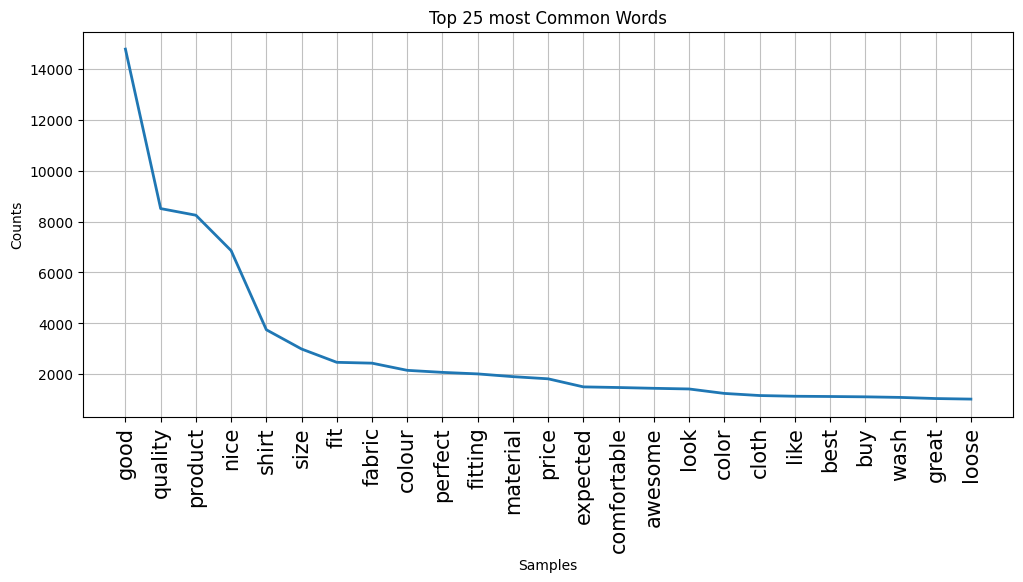

In [65]:
# Frequency Distribution

freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most Common Words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)
plt.show()

In [64]:
df_review.columns

Index(['product_id', 'product_name', 'product_description', 'discounted_price',
       'original_price', 'discount_percentage', 'fabric_material', 'neck_type',
       'overall_rating', 'votes', 'customer_rated_rating',
       'customer_review_text', 'reviewers_username', 'sentiment_label',
       'date_of_review', 'reviewers_product_images', 'cleaned_review_w/o_sw',
       'label_cleaned_review', 'fullycleaned_review_w/o_sw',
       'label_fullycleaned_w/o_sw', 'fullycleaned_reviews_with_sw',
       'label_with_sw'],
      dtype='object')

In [65]:
df_review['label_cleaned_review'].value_counts(normalize=True)*100

Positive    91.939346
Negative     8.060654
Name: label_cleaned_review, dtype: float64

In [66]:
df_review['label_fullycleaned_w/o_sw'].value_counts(normalize=True)*100

Positive    91.939346
Negative     8.060654
Name: label_fullycleaned_w/o_sw, dtype: float64

In [67]:
df_st = df_review.copy()

In [68]:
df_st.sample(2)

,product_id,product_name,product_description,discounted_price,original_price,discount_percentage,fabric_material,neck_type,overall_rating,votes,...,reviewers_username,sentiment_label,date_of_review,reviewers_product_images,cleaned_review_w/o_sw,label_cleaned_review,fullycleaned_review_w/o_sw,label_fullycleaned_w/o_sw,fullycleaned_reviews_with_sw,label_with_sw
732,18444460,WROGN,Men Blue & Silver-Toned Brand Logo Printed App...,449,999,55,Cotton,Round Neck,4.0,190,...,"['Ahad', 'Shaik', 'Will Smith', 'Shivam Vijay ...",Negative,"['22 Sept 2022', '5 June 2023', '21 Feb 2023',...","['https://assets.myntassets.com/h_150,q_75,w_1...",nice product everything is good except that...,Positive,nice product everything is good except that...,Positive,nice product good wrogn symbol good fitting be...,Positive
720,22837168,Cantabil,Half Sleeve Cotton Polo T-shirt,599,1499,60,Cotton,Polo Collar,4.0,6,...,"['Rahul Sharma', 'Gourav Dusad', 'Rohan', 'Sar...",Positive,"['13 Sept 2023', '13 Aug 2023', '12 Oct 2023',...","['https://assets.myntassets.com/h_150,q_75,w_1...",material is not good compared to other it s...,Negative,material is not good compared to other it s...,Negative,material good compared l size short look like ...,Positive


In [75]:
df_st.drop(['customer_review_text','sentiment_label',
                   'cleaned_review_w/o_sw','label_cleaned_review',
                   'fullycleaned_review_w/o_sw','label_fullycleaned_w/o_sw'],
           axis=1, inplace=True)

In [76]:
df_st.sample(3)

,product_id,product_name,product_description,discounted_price,original_price,discount_percentage,fabric_material,neck_type,overall_rating,votes,customer_rated_rating,reviewers_username,date_of_review,reviewers_product_images,fullycleaned_reviews_with_sw,label_with_sw
448,22517426,Bonkers Corner,Graphic Printed Loose Cotton T-shirt,799,999,20,Cotton,Round Neck,4.5,1510,"['5', '4', '5', '5', '5', '5', '5', '5', '1']","['Reddy Srikanth', 'Vamshi Addiwar', 'Myntra C...","['13 Oct 2023', '2 Oct 2023', '29 Sept 2023', ...",[],quality super printing perfect colour matching...,Positive
525,23853750,Roadster,The Life Co. Solid Polo Collar T-shirt,609,899,68,Cotton,Polo Collar,4.1,515,"['5', '4', '4', '4', '5', '5', '5', '4', '4', ...","['Anbarasu', 'Comrade', 'Gururaj B', 'Vaibhav ...","['9 Oct 2023', '14 Dec 2023', '11 Nov 2023', '...","['https://assets.myntassets.com/h_150,q_75,w_1...",superb design product good good nice ordered x...,Positive
276,17861064,HRX by Hrithik Roshan,HRX By Hrithik Roshan Training Men Rapid-Dry B...,449,899,50,Polyester,Round Neck,4.3,272,"['5', '3', '5', '4', '3', '4', '4', '3', '2', ...","['Swati', 'Myntra Customer', 'Mohammad Rehan M...","['11 Oct 2023', '25 Mar 2023', '1 Dec 2023', '...","['https://assets.myntassets.com/h_150,q_75,w_1...",hrx time love material great amezing product t...,Positive


In [77]:
df_st = df_st.rename(columns={'fullycleaned_reviews_with_sw': 'review_cleaned',
                              'label_with_sw':'review_label'})